In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import skimage as sk

In [151]:
patientNumber = "12"
regMethodDir = "gradientline"

dirpath = f"{os.getcwd()}\\input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\pacient{patientNumber}"
imagesFile = np.load(f"{dirpath}Images.npz")
pointsInfoFile = np.load(os.path.join(f"{dirpath}Points.npz"))
saveState = False

In [152]:
images = {key: imagesFile[key] for key in imagesFile.files}
points = {key: pointsInfoFile[key] for key in pointsInfoFile.files}

movingImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingInitialImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingInitialImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingFinalImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
fixedImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["fixedImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)

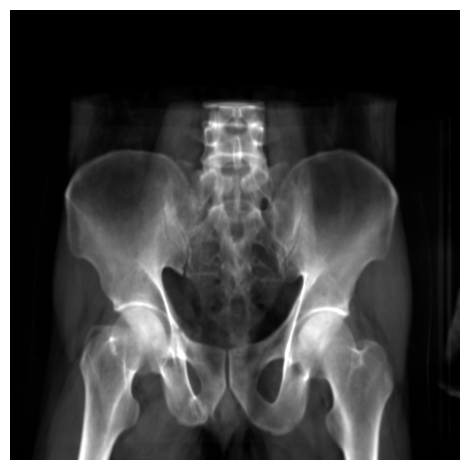

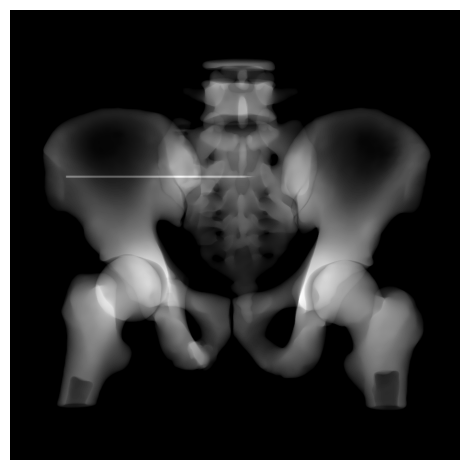

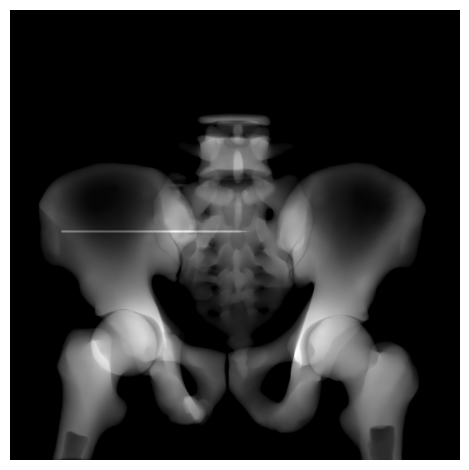

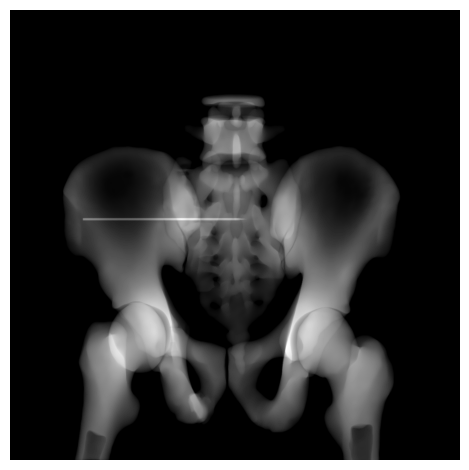

In [153]:
def plotImage(image, image_type, save):
    fig_image, ax_image = plt.subplots(1, 1)
    ax_image.imshow(sitk.GetArrayViewFromImage(image), cmap="gray")
    ax_image.set_axis_off()
    fig_image.tight_layout()
    
    # fig_moving, ax_moving = plt.subplots(1, 1)
    # ax_moving.imshow(sitk.GetArrayViewFromImage(moving_image), cmap="gray")
    # ax_moving.set_axis_off()
    # fig_moving.tight_layout()
    
    # fig_initial, ax_initial = plt.subplots(1, 1)
    # ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray")
    # ax_initial.set_axis_off()
    # fig_initial.tight_layout()
    plt.show()
        
    if save:
        # fig_fixed.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Fixed.svg", 
        #                   bbox_inches="tight")
        fig_image.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{image_type}"
                          f".png", bbox_inches="tight", pad_inches=0)
        fig_image.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{image_type}"
                          f".pdf", bbox_inches="tight", pad_inches=0)

plotImage(fixedImageRescaled, "Fixed", save=True)
plotImage(movingImageRescaled, "Moving", save=True)
plotImage(movingInitialImageRescaled, "Initial", save=True)
plotImage(movingFinalImageRescaled, "Final", save=True)

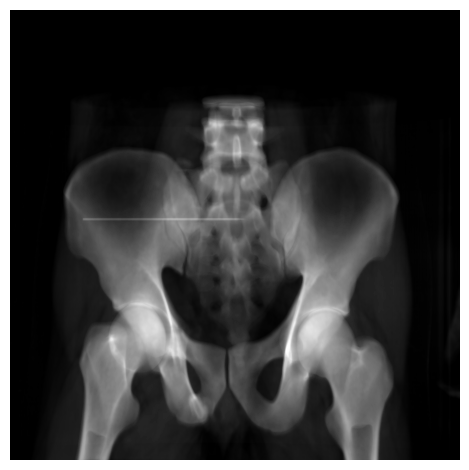

In [154]:
def plotAlphaBlend(image1: sitk.Image, image2, alpha=0.5, save=False):
    fig_alpha, ax_alpha = plt.subplots(1, 1)
    img1 = sitk.Cast(image1, sitk.sitkFloat32)
    img2 = sitk.Cast(image2, sitk.sitkFloat32)
    imageOutput = (alpha * img1) + (1 - alpha) * img2

    ax_alpha.imshow(sitk.GetArrayViewFromImage(imageOutput), cmap="gray")
    ax_alpha.set_axis_off()
    fig_alpha.tight_layout()
    plt.show()
    
    if save:
        fig_alpha.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}Alpha.pdf", 
                          bbox_inches="tight", pad_inches=0)
        fig_alpha.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}Alpha.png", 
                          bbox_inches="tight", pad_inches=0)

plotAlphaBlend(movingFinalImageRescaled, fixedImageRescaled, alpha=0.5, save=True)

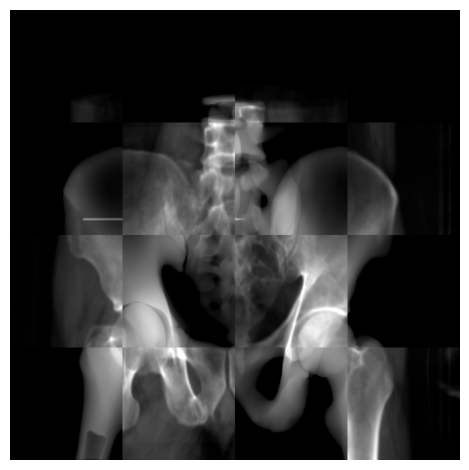

In [155]:
def plotCheckerboard(image1, image2, pattern=(4, 4), save=False):
    imagesCheckerboard = sitk.CheckerBoard(image1, image2, pattern)
    
    fig_check, ax_check = plt.subplots(1, 1)
    ax_check.imshow(sitk.GetArrayViewFromImage(imagesCheckerboard), cmap="gray")
    ax_check.set_axis_off()
    fig_check.tight_layout()
    plt.show()
    
    if save:
        fig_check.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}Checker"
                          f".png", bbox_inches="tight", pad_inches=0)
        fig_check.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}Checker"
                          f".pdf", bbox_inches="tight", pad_inches=0)

plotCheckerboard(fixedImageRescaled, movingFinalImageRescaled, pattern=(4, 4), save=True)

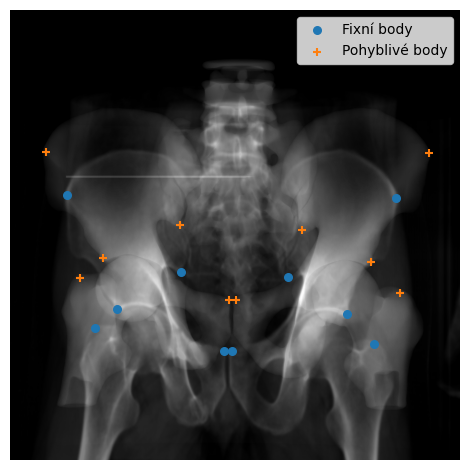

In [157]:
def plotImagesAndPoints(fixed_image, moving_pre, 
                        fixed_points, moving_points, 
                        reg_stage, save=False):
    fig_points, ax_points = plt.subplots(1, 1)
    ax_points.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_points.imshow(sitk.GetArrayViewFromImage(moving_pre), cmap="gray", alpha=0.5)
    ax_points.scatter(list(fixed_points.T)[0], list(fixed_points.T)[1], 
                c="#1f77b4", s=30, label="Fixní body")
    ax_points.scatter(list(moving_points.T)[0], list(moving_points.T)[1], 
                c="#ff7f0e", s=30, label="Pohyblivé body", marker="+")
    ax_points.set_axis_off()
    ax_points.legend()
    fig_points.tight_layout()
    
    # fig_initial, ax_initial = plt.subplots(1, 1)
    # ax_initial.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    # ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray", alpha=0.5) # alpha = 0.5
    # ax_initial.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
    #             c="#1f77b4", s=30, label="Fixní body")
    # ax_initial.scatter(list(points["movingInitialPoints"].T)[0], list(points["movingInitialPoints"].T)[1], 
    #             c="#ff7f0e", s=30, label="Pohyblivé body")
    # ax_initial.set_axis_off()
    # fig_initial.tight_layout()
    # 
    # fig_final, ax_final = plt.subplots(1, 1)
    # ax_final.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    # ax_final.imshow(sitk.GetArrayViewFromImage(moving_final), cmap="gray", alpha=0.5)
    # ax_final.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
    #             c="#1f77b4", s=30, label="Fixní body")
    # ax_final.scatter(list(points["movingFinalPoints"].T)[0], list(points["movingFinalPoints"].T)[1], 
    #             c="#ff7f0e", s=30, label="Pohyblivé body")
    # ax_final.set_axis_off()
    # # ax_final.legend(fontsize=12)
    # fig_final.tight_layout()
    # plt.show()
        
    if save:
        fig_points.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                           f"pacient{patientNumber}{reg_stage}Points.png", 
                           bbox_inches="tight", pad_inches=0)
        fig_points.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                           f"pacient{patientNumber}{reg_stage}Points.pdf", 
                           bbox_inches="tight", pad_inches=0)

plotImagesAndPoints(fixedImageRescaled, movingImageRescaled, 
                    fixed_points=points["fixedPoints"], moving_points=points["movingPoints"], 
                    reg_stage="Pre", save=True)
# plotImagesAndPoints(fixedImageRescaled, movingInitialImageRescaled,
#                     fixed_points=points["fixedPoints"], moving_points=points["movingInitialPoints"],
#                     reg_stage="Initial", save=True)
# plotImagesAndPoints(fixedImageRescaled, movingFinalImageRescaled, 
#                     fixed_points=points["fixedPoints"], moving_points=points["movingFinalPoints"],
#                     reg_stage="Final", save=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


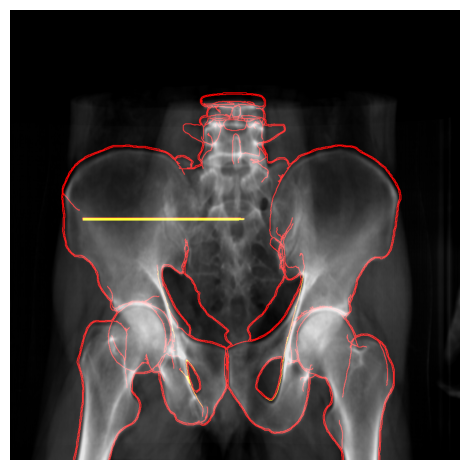

In [158]:
def plotImageAndEdge(fixed_image, moving_image,
                     low_thresh_bones: float = 0.0, high_thresh_bones: float = 0.0,
                     low_thresh_guide: float = 0.0, high_thresh_guide: float = 0.0,
                     save=False):
    
    input_image = sitk.GetImageFromArray(moving_image)
    bone_edges = sitk.CannyEdgeDetection(input_image,
                                         lowerThreshold=low_thresh_bones, 
                                         upperThreshold=high_thresh_bones)
    guide_edges = sitk.CannyEdgeDetection(input_image, 
                                          lowerThreshold=low_thresh_guide, 
                                          upperThreshold=high_thresh_guide)
    
    guide_closed = (sk.morphology.closing(sitk.GetArrayFromImage(guide_edges), 
                                          footprint=np.ones(shape=(5, 5))).astype(np.uint8))
    bones_dilated = 2 * sk.morphology.dilation(sitk.GetArrayFromImage(bone_edges), 
                                           footprint=np.ones(shape=(2, 2))).astype(np.uint8)
    
    colors = np.array([[255, 188, 0], [255, 0, 0]])
    fixed_image_labels = sk.color.label2rgb(guide_closed + bones_dilated, 
                                            image=sitk.GetArrayFromImage(fixed_image), 
                                            colors=colors,
                                            alpha=0.1,
                                            bg_label=0)
    # sitk_guide_closed = sitk.Cast(255 * sitk.GetImageFromArray(guide_closed), sitk.sitkUInt8)
    # edge_label = sitk.Cast(255 * sitk.GetImageFromArray(bones_dilated), sitk.sitkUInt8)
    
    # bones_dilated[bones_dilated == 1.] = 1
    # guide_closed[guide_closed == 1] = 2
    
    # edge_label[edge_label == 255] = 1
    # sitk_guide_closed[sitk_guide_closed == 255] = 2
    # all_labels = [edge_label, sitk_guide_closed]
    # 
    # # combined_labels = sitk.Image(all_labels[0].GetSize(), all_labels[0].GetPixelID())
    # combined_labels = edge_label + sitk_guide_closed
    # 
    # # for idx, label in enumerate(all_labels, start=1):
    # #     combined_labels += label * idx
    # 
    # guide_color = [255, 188, 0] # guidewire label color
    # bone_color = [255, 255, 0] # bone edges label color
    # 
    # images_combined = sitk.LabelOverlay(image=fixed_image,
    #                                     labelImage=combined_labels,
    #                                     opacity=1.0, backgroundValue=0.0, 
    #                                     colormap=guide_color + bone_color) # červené hrany

    fig_edge, ax_edge = plt.subplots(1, 1)
    ax_edge.imshow(fixed_image_labels)
    ax_edge.set_axis_off()
    fig_edge.tight_layout()
    plt.show()
    
    if save:
        fig_edge.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                         f"pacient{patientNumber}Edges.png", 
                         bbox_inches="tight", pad_inches=0)

plotImageAndEdge(fixedImageRescaled, images["movingFinalImage"],
                 low_thresh_bones=0.0, high_thresh_bones=0.4, 
                 low_thresh_guide=0.1, high_thresh_guide=0.5, save=True)
